# Group Assignment 4: Spatial Analysis

<b> Keven Michel, 10 March 2021 </b>

For this assignment I chose to focus on the public health programs dataset that I have previously worked in my other projects. This dataset, provided by the Los Angeles County, focuses on all the public health programs that exist within the county and where they are located. I chose to focus on this data to get a better understanding of 





In [31]:
## import all the neccessary libraries for my code

import pandas as pd
import geopandas as gpd
import contextily as ctx 
import matplotlib.pyplot as plt 

import seaborn as sns 
import numpy as np

from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [20]:
php = gpd.read_file("datasets/HEC2.geojson")

In [23]:
php["x"] = php.geometry.x
php["y"] = php.geometry.y

In [24]:
mean_center = centrography.mean_center(php[['x','y']])
med_center = centrography.euclidean_median(php[['x','y']])

## Finding the Median/Mean for all Cities in LA County

<b> Figure 1 </b>

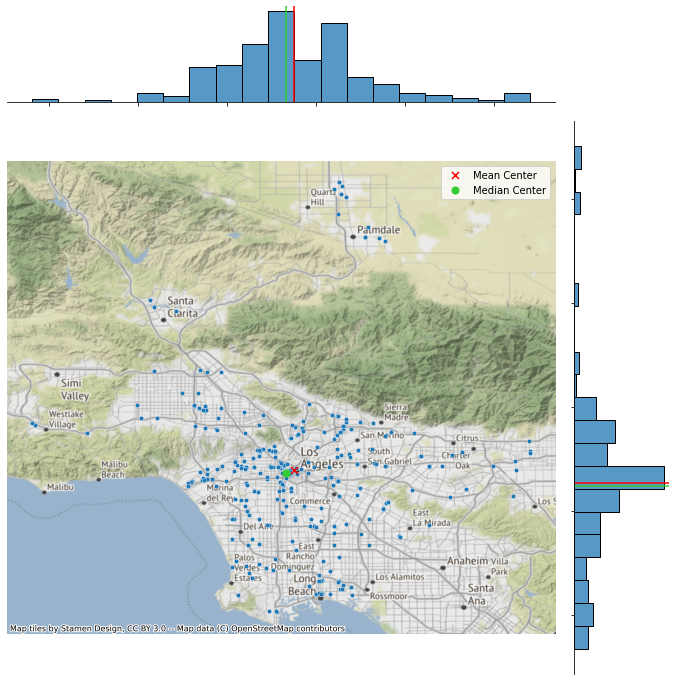

In [27]:
k = sns.jointplot(data = php, 
                  x = "x", 
                  y = "y", 
                  s = 20, 
                  height = 10)

k.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
k.ax_marg_x.axvline(mean_center[0], color='red')
k.ax_marg_y.axhline(mean_center[1], color='red')

k.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
k.ax_marg_x.axvline(med_center[0], color='limegreen')
k.ax_marg_y.axhline(med_center[1], color='limegreen')

k.ax_joint.legend()

k.ax_joint.set_axis_off()

ctx.add_basemap(k.ax_joint,
                crs='epsg:4326')

plt.show()

<b> Results </b> 

In this map, each blue dot represents a location where a public health program is offered to the public within the county of Los Angeles. The mean is the center for a set, in this case the number of public health programs in within the county, while the median reprsents a point which minimizes the distance from a point of origin to another point. The results here show us how far exactly is a neighborhood and their programs are relative to indviduals that live furthest from the point.

<b> Figure 2 </b>

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


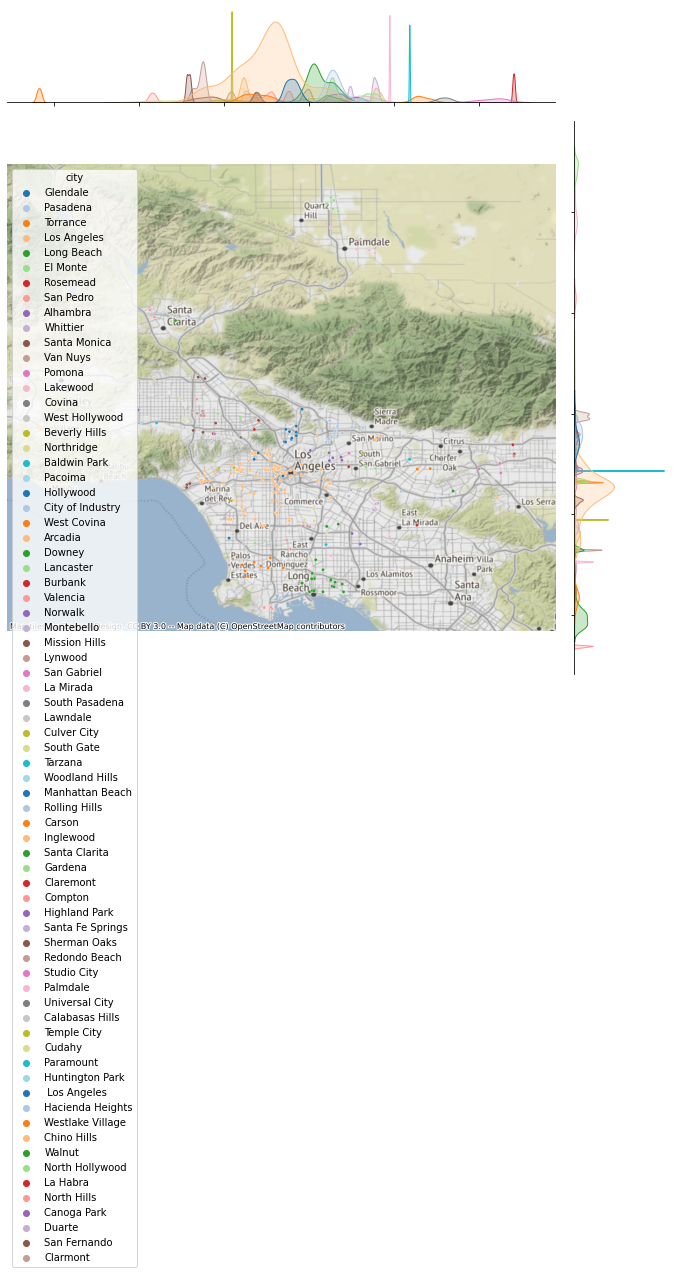

In [9]:
k=sns.jointplot(data=php,
            x='x', 
            y='y',
            hue='city',
            palette='tab20',
            s=10,
            height = 10
           )
k.ax_joint.set_axis_off()
ctx.add_basemap(k.ax_joint,
                crs='epsg:4326')

<b> Results </b>

This map illustrates to us all the public health programs that exist within the LA County. But it adds more depth by allowing the audience to view where within each city in the couty is there a concentration of these public health programs. By developing this map, I am better able to see which city has a higher density of these programs and also where most of them are located within the county.

## Program Concentrations Within Cities

<b> Figure 3 </b>

In [ ]:
top10 = php["city"].value_counts().head(10).index.tolist()
top10

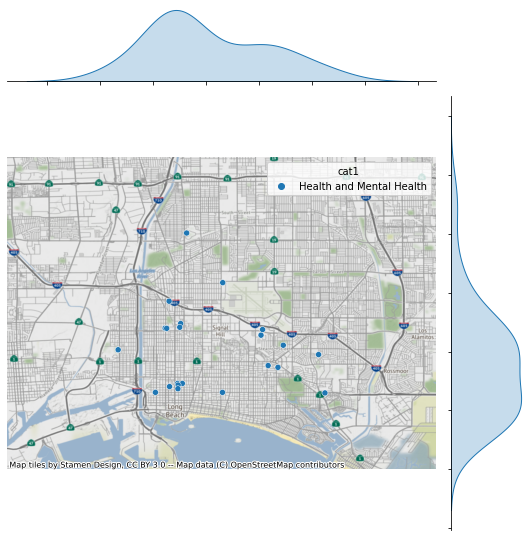

In [29]:
j= sns.jointplot(data=php[php['city']=='Long Beach'],
            x='x', 
            y='y',
            hue = "cat1",
            height = 8)

j.ax_joint.set_axis_off()
ctx.add_basemap(j.ax_joint,
                crs='epsg:4326')

<b> Results </b>

In figure 3, we can see the City of Long Beach and the public health programs that exist within the boundaries within this city. The biggest takeaway from developing a map like this is to see where these programs are located in relation to the individuals that live in this city. For example, as you can notice on the map, the density of programs looks to have a higher concentration southbound and westbound of the city. This lets us ask questions on how people north of these programs are able to access them do to transportation inconviences. 

<b> Figure 4 </b>

Similar to figure 3, I chose to look at the northern city of Pasadena in LA County to compare the differences on the location of public health services. A good comparison to note in figure 4 is how these programs are located much more to the center compared to the Long Beach where most of the programs were further south. Does having these services at the center of the city benefit the residents a lot more? 

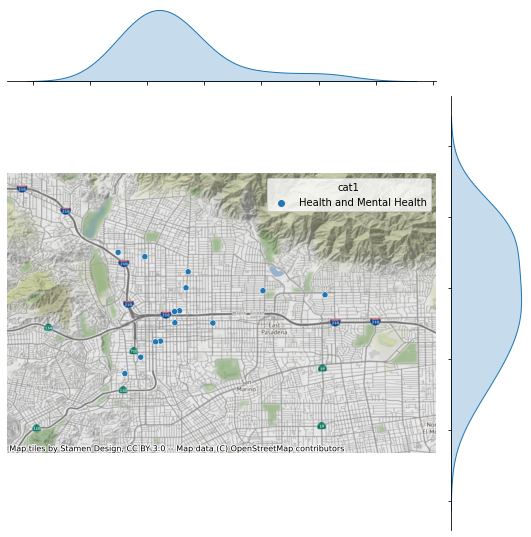

In [30]:
o=sns.jointplot(data=php[php['city']=='Pasadena'],
            x='x', 
            y='y',
           hue = "cat1",
            height = 8)

o.ax_joint.set_axis_off()
ctx.add_basemap(o.ax_joint,
                crs='epsg:4326')

##
These visualizations were created by Keven Michel with the intention of further developing them in conjuction to the overall scope of the project.

